# Exercise 1 - Sandro Suter

The first exercise in the module "Computational Language Technologies" contains three subsections, which have to be conducted.

1. Pick a topic that you are interested in and exists as a Wikipedia category or subcategory and extract the title, summary (and anything else you like, e.g., German equivalents).

2. Organize (and clean) the data into a dataframe. Add text features (length of title/description, TTR, POSs), and conduct an exploratory data &
text analysis, e.g., missing data points, length of lead section, inspect content of text.

3.  Summarize your learnings including shortcomings of the used NLP tools and text.

In this colab-Notebook I will do the tasks one by one.

## Pick a Topic and extract the data and create DataFrame

In order to get the most interesting project possible, I would like to scrap two topics that have a high degree of actuality and a lot of data. For this reason, I have chosen the Wikipedia categories '[Politics & Sports](https://en.wikipedia.org/wiki/Category:Politics_and_sports)' and '[Communication theory](https://en.wikipedia.org/wiki/Category:Communication_theory)'.

With the recent Winter Olympics in Beijing, the upcoming Football World Cup in Qatar and the numerous sponsorships of sports clubs by partners from politically, at least questionable, regions, the issue is becoming highly relevant. Furthermore, the categories both show 106 pages of content, which is a sufficiently large amount of data.

The first thing to do is to set up the setup and scrape the data for the two Wikipedia categories:



## Setup

In [ ]:
# Install all the required packages
!pip install wikipedia-api
!pip install eng-to-ipa
!pip install -U spacy
!python -m spacy download en_core_web_sm

     |████████████████████████████████| 12.8 MB 6.2 MB/s 
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [ ]:
#Import the required packages
import eng_to_ipa as ipa
import spacy
import nltk
nltk.download('punkt')
import wikipediaapi
import pandas as pd
import re

#Set visual options
pd.set_option('display.max_columns', None)
pd.set_option('max_colwidth', None)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
# Define language and page
wiki = wikipediaapi.Wikipedia('en')

## Scrape data 

### Politics and Sports

In [ ]:
# Get members for a category together with a short description
def members_collector(category):
      mdict = {}
      categorymembers = category.categorymembers
      for c in categorymembers.values():
        if c.ns == 0:                                                            # Exclude categories within the category
          mdict[c.title] = c.summary
      return mdict

In [ ]:
#Set Category
politics_sports = wiki.page("Category: Politics and sports")

In [ ]:
#Use above function
politics_sports_dict = members_collector(politics_sports)

In [ ]:
#Create DataFrame with the above scraped informations
pol_spo_df = pd.DataFrame([politics_sports_dict.keys(), politics_sports_dict.values()]).T
pol_spo_df.columns = ['Name', 'Description']
df_ps = pol_spo_df

In [ ]:
#Have a first look
df_ps

,Name,Description
0,Politics and sports,"Politics and sports or sports diplomacy describes the use of sport as a means to influence diplomatic, social, and political relations. Sports diplomacy may transcend cultural differences and bring people together.\nThe use of sports and politics has had both positive and negative implications over history. Sports competitions or activities have had the intention to bring about change in certain cases. Nationalistic fervour is sometimes linked to victories or losses to some sport on sports fields.While the Olympics is often the biggest political example of using sports for diplomatic means, cricket and association football, as well as other sports in the global arena, have also been used in this regard. In the case of Apartheid, sport was used to isolate South Africa and bring about a major overhaul in the country's social structure. While ethnicity, race, social class and more can cause division, sports is also said to help blend differences.Additionally, numerous athletes have sought political office such as Imran Khan and George Weah, some of them unsuccessfully, on either the national level or the sub-national current.\nSome matches have also had national diplomatic incidents."
1,1939 International University Games (Vienna),"An International University Games (German: Studenten-Weltspiele) was an international multi-sport event held between 20–27 August 1939 in Vienna, German Reich (now Vienna, Austria), which had originally been scheduled as the official 1939 staging of the Summer International University Games awarded to Vienna by the Confederation Internationale des Etudiants (CIE) in January 1938, prior to Austria's absorption into Nazi Germany by the Anschluss. The National Socialist German Students' League (NSDStB) withdrew from the CIE in May 1939, and the CIE at short notice moved its version of the 1939 International University Games to Monte Carlo.\nThe formal opening was by Bernhard Rust, the Reich Minister of Science, Education and Culture, on 20 August in the Prater Stadium, the main venue of the games. The NSDStB invited many nations to the Vienna games, but most entrants were nations affiliated with the Axis powers. The following countries were reported to have participated in the games: Kingdom of Bulgaria, Estonia, Finland, German Reich, Kingdom of Hungary, Kingdom of Italy, Empire of Japan, Peru, Slovak Republic, Spanish State, Union of South Africa, Sweden, and Kingdom of Yugoslavia. The International Institute of Intellectual Cooperation stated in 1940, ""The results of the Monaco Games were much superior to those of the Vienna Games."""
2,1961 Boston Celtics boycott,"In October 1961, three African-American basketball players of the Boston Celtics boycotted a National Basketball Association exhibition game in Lexington, Kentucky, against the St. Louis Hawks, after facing racial discrimination in the city."
3,1967 FIVB Volleyball Women's World Championship,"The 1967 FIVB Women's World Championship was the fifth edition of the tournament, organised by the world's governing body, the FIVB. It was held from 25 to 29 January 1967 at the Nippon Budokan in Tokyo, Japan."
4,1968 Olympics Black Power salute,"During their medal ceremony in the Olympic Stadium in Mexico City on October 16, 1968, two African-American athletes, Tommie Smith and John Carlos, each raised a black-gloved fist during the playing of the US national anthem, ""The Star-Spangled Banner"". While on the podium, Smith and Carlos, who had won gold and bronze medals respectively in the 200-meter running event of the 1968 Summer Olympics, turned to face the US flag and then kept their hands raised until the anthem had finished. In addition, Smith, Carlos, and Australian silver medalist Peter Norman all wore human-rights badges on their jackets.\nIn his autobiography, Silent Gesture, published nearly 30 years later, Smith revised his statement that the gesture was not a ""Black Power"" salute per se, but rath

### Communication Theory

In [ ]:
#Set Category
communication = wiki.page("Category: Communication theory")

In [ ]:
#Use above function
communication_dict = members_collector(communication)

In [ ]:
#Create DataFrame
df_comm = pd.DataFrame([communication_dict.keys(), communication_dict.values()]).T
df_comm.columns = ['Name', 'Description']


In [ ]:
#Have a first look
df_comm

,Name,Description
0,Poole's Multiple Sequence Model,"Poole’s Multiple Sequence Model is a communication theory approach developed by Marshall Scott Poole in 1983. The model focuses on decision making processes in groups, and rejects other widely held communication theories in favor of less linear decision making processes. The multiple sequence model suggests that group activity needs a developing and changing development of communication. This model has three specific parts: developing strands, emphasison task accomplishment, and tracks of group activity"
1,Regulatory focus theory,"Regulatory focus theory (RFT) is a theory of goal pursuit: 444 formulated by Columbia University psychology professor and researcher E. Tory Higgins regarding people's perceptions in the decision making process. RFT examines the relationship between the motivation of a person and the way in which they go about achieving their goal. RFT posits two separate and independent self-regulatory orientations: prevention and promotion (Higgins, 1997).\nThis psychological theory, like many others, is applied in communication, specifically in the subfields of nonverbal communication and persuasion. Chronic regulatory focus is measured using the Regulatory Focus Questionnaire (Higgins et al., 2001) or the Regulatory Strength measure. Momentary regulatory focus can be primed or induced."
2,Social identity model of deindividuation effects,"The social identity model of deindividuation effects (or SIDE model) is a theory developed in social psychology and communication studies. SIDE explains the effects of anonymity and identifiability on group behavior. It has become one of several theories of technology that describe social effects of computer-mediated communication.\nThe SIDE model provides an alternative explanation for effects of anonymity and other ""deindividuating"" factors that classic deindividuation theory cannot adequately explain. The model suggests that anonymity changes the relative salience of personal vs. social identity, and thereby can have a profound effect on group behavior.\nThe social identity model of deindividuation effects (or SIDE model) is a theory developed in social psychology and communication studies. SIDE explains the effects of anonymity and identifiability on group behavior. It has become one of several theories examining technology that describe social effects of computer-mediated communication. With advancing technology it is becoming increasingly researched what the effects of having the control of being incognito on the web, and also having profiles that represent ones person is doing to relationships and communication in our lives. The SIDE model provides an alternative explanation for effects of anonymity and other ""deindividuating"" factors that classic deindividuation theory cannot adequately explain. To understand the model of deindividuation, it is described by scholarly articles as ""the situation in which individuals act in groups and do not see themselves as individuals, thereby facilitating antinormative behavior"". Furthermore, research on social identity model of deindividuation investigates prosocial behavior, prevent social disturbance and prevent child prejudice. It is said that conformity to group norms is a large part of deindividuation when understanding social identity with in it. The model suggests that anonymity changes the relative salience of personal vs. social identity, and thereby can have a profound effect on group behavior. While other studies on this suggest that the identification of self through online groups lessens ones actual idea of personal identity outside of online spaces; concluding that even when personal identity is seemingly salient in online spaces it still further disassociates the person with themselves outside of online communities."
3,Symbolic convergence theory,"Symbolic convergence theory (SCT) is a communication theory developed by Ernest Bormann proposing that the holding of 

## Clean data

### Categorize data

In [ ]:
#Create column 'Category' for Politics and Sports
df_ps.insert(loc= 0,
             column='Category',
             value='Politics and Sports')

df_ps

,Category,Name,Description
0,Politics and Sports,Politics and sports,"Politics and sports or sports diplomacy describes the use of sport as a means to influence diplomatic, social, and political relations. Sports diplomacy may transcend cultural differences and bring people together.\nThe use of sports and politics has had both positive and negative implications over history. Sports competitions or activities have had the intention to bring about change in certain cases. Nationalistic fervour is sometimes linked to victories or losses to some sport on sports fields.While the Olympics is often the biggest political example of using sports for diplomatic means, cricket and association football, as well as other sports in the global arena, have also been used in this regard. In the case of Apartheid, sport was used to isolate South Africa and bring about a major overhaul in the country's social structure. While ethnicity, race, social class and more can cause division, sports is also said to help blend differences.Additionally, numerous athletes have sought political office such as Imran Khan and George Weah, some of them unsuccessfully, on either the national level or the sub-national current.\nSome matches have also had national diplomatic incidents."
1,Politics and Sports,1939 International University Games (Vienna),"An International University Games (German: Studenten-Weltspiele) was an international multi-sport event held between 20–27 August 1939 in Vienna, German Reich (now Vienna, Austria), which had originally been scheduled as the official 1939 staging of the Summer International University Games awarded to Vienna by the Confederation Internationale des Etudiants (CIE) in January 1938, prior to Austria's absorption into Nazi Germany by the Anschluss. The National Socialist German Students' League (NSDStB) withdrew from the CIE in May 1939, and the CIE at short notice moved its version of the 1939 International University Games to Monte Carlo.\nThe formal opening was by Bernhard Rust, the Reich Minister of Science, Education and Culture, on 20 August in the Prater Stadium, the main venue of the games. The NSDStB invited many nations to the Vienna games, but most entrants were nations affiliated with the Axis powers. The following countries were reported to have participated in the games: Kingdom of Bulgaria, Estonia, Finland, German Reich, Kingdom of Hungary, Kingdom of Italy, Empire of Japan, Peru, Slovak Republic, Spanish State, Union of South Africa, Sweden, and Kingdom of Yugoslavia. The International Institute of Intellectual Cooperation stated in 1940, ""The results of the Monaco Games were much superior to those of the Vienna Games."""
2,Politics and Sports,1961 Boston Celtics boycott,"In October 1961, three African-American basketball players of the Boston Celtics boycotted a National Basketball Association exhibition game in Lexington, Kentucky, against the St. Louis Hawks, after facing racial discrimination in the city."
3,Politics and Sports,1967 FIVB Volleyball Women's World Championship,"The 1967 FIVB Women's World Championship was the fifth edition of the tournament, organised by the world's governing body, the FIVB. It was held from 25 to 29 January 1967 at the Nippon Budokan in Tokyo, Japan."
4,Politics and Sports,1968 Olympics Black Power salute,"During their medal ceremony in the Olympic Stadium in Mexico City on October 16, 1968, two African-American athletes, Tommie Smith and John Carlos, each raised a black-gloved fist during the playing of the US national anthem, ""The Star-Spangled Banner"". While on the podium, Smith and Carlos, who had won gold and bronze medals respectively in the 200-meter running event of the 1968 Summer Olympics, turned to face the US flag and then kept their hands raised until the anthem had finished. In addition, Smith, Carlos, and Australian silver medalist Peter Norman all wore human-rights badges on their jackets.\nIn his autobiography, Silent Gesture, published nearly 3

In [ ]:
#Create column 'Category' for Communication Theory
df_comm.insert(loc = 0,
               column = 'Category',
               value = 'Communication Theory')

df_comm

,Category,Name,Description
0,Communication Theory,Poole's Multiple Sequence Model,"Poole’s Multiple Sequence Model is a communication theory approach developed by Marshall Scott Poole in 1983. The model focuses on decision making processes in groups, and rejects other widely held communication theories in favor of less linear decision making processes. The multiple sequence model suggests that group activity needs a developing and changing development of communication. This model has three specific parts: developing strands, emphasison task accomplishment, and tracks of group activity"
1,Communication Theory,Regulatory focus theory,"Regulatory focus theory (RFT) is a theory of goal pursuit: 444 formulated by Columbia University psychology professor and researcher E. Tory Higgins regarding people's perceptions in the decision making process. RFT examines the relationship between the motivation of a person and the way in which they go about achieving their goal. RFT posits two separate and independent self-regulatory orientations: prevention and promotion (Higgins, 1997).\nThis psychological theory, like many others, is applied in communication, specifically in the subfields of nonverbal communication and persuasion. Chronic regulatory focus is measured using the Regulatory Focus Questionnaire (Higgins et al., 2001) or the Regulatory Strength measure. Momentary regulatory focus can be primed or induced."
2,Communication Theory,Social identity model of deindividuation effects,"The social identity model of deindividuation effects (or SIDE model) is a theory developed in social psychology and communication studies. SIDE explains the effects of anonymity and identifiability on group behavior. It has become one of several theories of technology that describe social effects of computer-mediated communication.\nThe SIDE model provides an alternative explanation for effects of anonymity and other ""deindividuating"" factors that classic deindividuation theory cannot adequately explain. The model suggests that anonymity changes the relative salience of personal vs. social identity, and thereby can have a profound effect on group behavior.\nThe social identity model of deindividuation effects (or SIDE model) is a theory developed in social psychology and communication studies. SIDE explains the effects of anonymity and identifiability on group behavior. It has become one of several theories examining technology that describe social effects of computer-mediated communication. With advancing technology it is becoming increasingly researched what the effects of having the control of being incognito on the web, and also having profiles that represent ones person is doing to relationships and communication in our lives. The SIDE model provides an alternative explanation for effects of anonymity and other ""deindividuating"" factors that classic deindividuation theory cannot adequately explain. To understand the model of deindividuation, it is described by scholarly articles as ""the situation in which individuals act in groups and do not see themselves as individuals, thereby facilitating antinormative behavior"". Furthermore, research on social identity model of deindividuation investigates prosocial behavior, prevent social disturbance and prevent child prejudice. It is said that conformity to group norms is a large part of deindividuation when understanding social identity with in it. The model suggests that anonymity changes the relative salience of personal vs. social identity, and thereby can have a profound effect on group behavior. While other studies on this suggest that the identification of self through online groups lessens ones actual idea of personal identity outside of online spaces; concluding that even when personal identity is seemingly salient in online spaces it still further disassociates the person with themselves outside of online communities."
3,Communication Theory,Symbolic convergence theory,"Symbolic convergence theo

### Remove first entry df_ps

The first entry in df_ps represents the description of the Category itself and has to be removed:

In [ ]:
#Drop first Entry of 'Politics and Sports' since it's a description of the category
df_ps.drop(index=df_comm.index[0], 
        axis=0, 
        inplace=True)

df_ps

,Category,Name,Description
1,Politics and Sports,1939 International University Games (Vienna),"An International University Games (German: Studenten-Weltspiele) was an international multi-sport event held between 20–27 August 1939 in Vienna, German Reich (now Vienna, Austria), which had originally been scheduled as the official 1939 staging of the Summer International University Games awarded to Vienna by the Confederation Internationale des Etudiants (CIE) in January 1938, prior to Austria's absorption into Nazi Germany by the Anschluss. The National Socialist German Students' League (NSDStB) withdrew from the CIE in May 1939, and the CIE at short notice moved its version of the 1939 International University Games to Monte Carlo.\nThe formal opening was by Bernhard Rust, the Reich Minister of Science, Education and Culture, on 20 August in the Prater Stadium, the main venue of the games. The NSDStB invited many nations to the Vienna games, but most entrants were nations affiliated with the Axis powers. The following countries were reported to have participated in the games: Kingdom of Bulgaria, Estonia, Finland, German Reich, Kingdom of Hungary, Kingdom of Italy, Empire of Japan, Peru, Slovak Republic, Spanish State, Union of South Africa, Sweden, and Kingdom of Yugoslavia. The International Institute of Intellectual Cooperation stated in 1940, ""The results of the Monaco Games were much superior to those of the Vienna Games."""
2,Politics and Sports,1961 Boston Celtics boycott,"In October 1961, three African-American basketball players of the Boston Celtics boycotted a National Basketball Association exhibition game in Lexington, Kentucky, against the St. Louis Hawks, after facing racial discrimination in the city."
3,Politics and Sports,1967 FIVB Volleyball Women's World Championship,"The 1967 FIVB Women's World Championship was the fifth edition of the tournament, organised by the world's governing body, the FIVB. It was held from 25 to 29 January 1967 at the Nippon Budokan in Tokyo, Japan."
4,Politics and Sports,1968 Olympics Black Power salute,"During their medal ceremony in the Olympic Stadium in Mexico City on October 16, 1968, two African-American athletes, Tommie Smith and John Carlos, each raised a black-gloved fist during the playing of the US national anthem, ""The Star-Spangled Banner"". While on the podium, Smith and Carlos, who had won gold and bronze medals respectively in the 200-meter running event of the 1968 Summer Olympics, turned to face the US flag and then kept their hands raised until the anthem had finished. In addition, Smith, Carlos, and Australian silver medalist Peter Norman all wore human-rights badges on their jackets.\nIn his autobiography, Silent Gesture, published nearly 30 years later, Smith revised his statement that the gesture was not a ""Black Power"" salute per se, but rather a ""human rights"" salute. The demonstration is regarded as one of the most overtly political statements in the history of the modern Olympics."
5,Politics and Sports,1971 World Table Tennis Championships,"The 1971 World Table Tennis Championships (31st) were held in Nagoya from March 28 to April 7, 1971.The Chinese players returned following a lengthy absence.The nations represented were Austria, Czechoslovakia, the People's Republic of China, England, West Germany Hungary, India, Japan, North Korea and South Korea, Romania, the Soviet Union, and Yugoslavia."
...,...,...,...
102,Politics and Sports,USA–USSR Track and Field Dual Meet Series,"USA-USSR Dual Track Meet Series was a track and field meeting between United States and Soviet Union. It was held 19 times during the Cold War era from 1958 to 1985. The meeting was arranged alternatively in both countries, exception being the last event in 1985 which was held in Tokyo, Japan. Seven indoor meetings were also competed in the 1970s. Although the meetings were foremost athletic competitions, they served as propaganda and foreign diplomacy tools as well.The most cl

### Merge DataFrames

In [ ]:
#Merge two categories (df_ps & df_comm) to one DataFrame
df_data = pd.concat([df_ps, df_comm], ignore_index=True)

In [ ]:
#Check if worked
df_data

,Category,Name,Description
0,Politics and Sports,1939 International University Games (Vienna),"An International University Games (German: Studenten-Weltspiele) was an international multi-sport event held between 20–27 August 1939 in Vienna, German Reich (now Vienna, Austria), which had originally been scheduled as the official 1939 staging of the Summer International University Games awarded to Vienna by the Confederation Internationale des Etudiants (CIE) in January 1938, prior to Austria's absorption into Nazi Germany by the Anschluss. The National Socialist German Students' League (NSDStB) withdrew from the CIE in May 1939, and the CIE at short notice moved its version of the 1939 International University Games to Monte Carlo.\nThe formal opening was by Bernhard Rust, the Reich Minister of Science, Education and Culture, on 20 August in the Prater Stadium, the main venue of the games. The NSDStB invited many nations to the Vienna games, but most entrants were nations affiliated with the Axis powers. The following countries were reported to have participated in the games: Kingdom of Bulgaria, Estonia, Finland, German Reich, Kingdom of Hungary, Kingdom of Italy, Empire of Japan, Peru, Slovak Republic, Spanish State, Union of South Africa, Sweden, and Kingdom of Yugoslavia. The International Institute of Intellectual Cooperation stated in 1940, ""The results of the Monaco Games were much superior to those of the Vienna Games."""
1,Politics and Sports,1961 Boston Celtics boycott,"In October 1961, three African-American basketball players of the Boston Celtics boycotted a National Basketball Association exhibition game in Lexington, Kentucky, against the St. Louis Hawks, after facing racial discrimination in the city."
2,Politics and Sports,1967 FIVB Volleyball Women's World Championship,"The 1967 FIVB Women's World Championship was the fifth edition of the tournament, organised by the world's governing body, the FIVB. It was held from 25 to 29 January 1967 at the Nippon Budokan in Tokyo, Japan."
3,Politics and Sports,1968 Olympics Black Power salute,"During their medal ceremony in the Olympic Stadium in Mexico City on October 16, 1968, two African-American athletes, Tommie Smith and John Carlos, each raised a black-gloved fist during the playing of the US national anthem, ""The Star-Spangled Banner"". While on the podium, Smith and Carlos, who had won gold and bronze medals respectively in the 200-meter running event of the 1968 Summer Olympics, turned to face the US flag and then kept their hands raised until the anthem had finished. In addition, Smith, Carlos, and Australian silver medalist Peter Norman all wore human-rights badges on their jackets.\nIn his autobiography, Silent Gesture, published nearly 30 years later, Smith revised his statement that the gesture was not a ""Black Power"" salute per se, but rather a ""human rights"" salute. The demonstration is regarded as one of the most overtly political statements in the history of the modern Olympics."
4,Politics and Sports,1971 World Table Tennis Championships,"The 1971 World Table Tennis Championships (31st) were held in Nagoya from March 28 to April 7, 1971.The Chinese players returned following a lengthy absence.The nations represented were Austria, Czechoslovakia, the People's Republic of China, England, West Germany Hungary, India, Japan, North Korea and South Korea, Romania, the Soviet Union, and Yugoslavia."
...,...,...,...
207,Communication Theory,Toronto School of communication theory,"The Toronto School is a school of thought in communication theory and literary criticism, the principles of which were developed chiefly by scholars at the University of Toronto. It is characterized by exploration of Ancient Greek literature and the theoretical view that communication systems create psychological and social states. The school originated from the works of Eric A. Havelock and Harold Innis in the 1930s, and grew to prominence with the contributions of Edmund Snow C

### Remove digits & punctuation

In [ ]:
#Define function to remove digits
def replace_digits(df, column):
  #Loop over list of digits
  for i in ['1','2','3','4','5','6','7','8','9','0']:
    #loop over df
    for x in range(len(df.index)):
      #Search for digit in every entry and replace it by ''
      if i in df[column][x]:
        df[column][x] = df[column][x].replace(i,'')

#Define fuction to remove punctuation
def replace_punctuation(df, column):
  #Loop over list of most used punctuations
  for i in [',',';',':','.', '?', '!', "'", '-', '_', '"', '(', ')', '[',']']:
    #Loop over passed df
    for x in range(len(df.index)):
      #Search for punctuations and replace id by ''
      if i in df[column][x]:
        df[column][x] = df[column][x].replace(i,'') 

In [ ]:
#Use functions above for column 'Name'
replace_digits(df_data, 'Name')

replace_punctuation(df_data, 'Name')

In [ ]:
#Use functions above for column 'Description'
replace_digits(df_data, 'Description')

replace_punctuation(df_data, 'Description')

In [ ]:
#Check if it worked
df_data.head()

,Category,Name,Description
0,Politics and Sports,International University Games Vienna,An International University Games German StudentenWeltspiele was an international multisport event held between – August in Vienna German Reich now Vienna Austria which had originally been scheduled as the official staging of the Summer International University Games awarded to Vienna by the Confederation Internationale des Etudiants CIE in January prior to Austrias absorption into Nazi Germany by the Anschluss The National Socialist German Students League NSDStB withdrew from the CIE in May and the CIE at short notice moved its version of the International University Games to Monte Carlo\nThe formal opening was by Bernhard Rust the Reich Minister of Science Education and Culture on August in the Prater Stadium the main venue of the games The NSDStB invited many nations to the Vienna games but most entrants were nations affiliated with the Axis powers The following countries were reported to have participated in the games Kingdom of Bulgaria Estonia Finland German Reich Kingdom of Hungary Kingdom of Italy Empire of Japan Peru Slovak Republic Spanish State Union of South Africa Sweden and Kingdom of Yugoslavia The International Institute of Intellectual Cooperation stated in The results of the Monaco Games were much superior to those of the Vienna Games
1,Politics and Sports,Boston Celtics boycott,In October three AfricanAmerican basketball players of the Boston Celtics boycotted a National Basketball Association exhibition game in Lexington Kentucky against the St Louis Hawks after facing racial discrimination in the city
2,Politics and Sports,FIVB Volleyball Womens World Championship,The FIVB Womens World Championship was the fifth edition of the tournament organised by the worlds governing body the FIVB It was held from to January at the Nippon Budokan in Tokyo Japan
3,Politics and Sports,Olympics Black Power salute,During their medal ceremony in the Olympic Stadium in Mexico City on October two AfricanAmerican athletes Tommie Smith and John Carlos each raised a blackgloved fist during the playing of the US national anthem The StarSpangled Banner While on the podium Smith and Carlos who had won gold and bronze medals respectively in the meter running event of the Summer Olympics turned to face the US flag and then kept their hands raised until the anthem had finished In addition Smith Carlos and Australian silver medalist Peter Norman all wore humanrights badges on their jackets\nIn his autobiography Silent Gesture published nearly years later Smith revised his statement that the gesture was not a Black Power salute per se but rather a human rights salute The demonstration is regarded as one of the most overtly political statements in the history of the modern Olympics
4,Politics and Sports,World Table Tennis Championships,The World Table Tennis Championships st were held in Nagoya from March to April The Chinese players returned following a lengthy absenceThe nations represented were Austria Czechoslovakia the Peoples Republic of China England West Germany Hungary India Japan North Korea and South Korea Romania the Soviet Union and Yugoslavia


### Remove Stopwords

In [ ]:
#Import nltk to remove stopwords
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

#Download stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
#Define english stopwords
stop_words = set(stopwords.words('english'))

In [ ]:
#Define empty list to store cleaned descriptions
list_cleaned = []

#Loop over df
for i in range(len(df_data)):
  #Extract string
  text = df_data['Description'][i]

  #tokenize extractet string
  word_tokens = word_tokenize(text)
  #Define another empty list to handle extractet string
  list_description_without_stopword = []

  #Loop over word tokens
  for x in word_tokens:
    #Search for words which are not in stopwords
    if x not in stop_words:
      #Append Non-Stopwords to list
      list_description_without_stopword.append(x.lower())
  
  #Restore text without stopwords
  text = ' '.join([token for token in list_description_without_stopword])

  #Append cleaned text to list_cleaned  
  list_cleaned.append(text)
  

In [ ]:
#Append list to df_data
df_data.insert(loc= len(df_data.columns),
               column = 'Description_cleaned',
               value = list_cleaned)

In [ ]:
#Check if successfull
df_data

,Category,Name,Description,Description_cleaned
0,Politics and Sports,International University Games Vienna,An International University Games German StudentenWeltspiele was an international multisport event held between – August in Vienna German Reich now Vienna Austria which had originally been scheduled as the official staging of the Summer International University Games awarded to Vienna by the Confederation Internationale des Etudiants CIE in January prior to Austrias absorption into Nazi Germany by the Anschluss The National Socialist German Students League NSDStB withdrew from the CIE in May and the CIE at short notice moved its version of the International University Games to Monte Carlo\nThe formal opening was by Bernhard Rust the Reich Minister of Science Education and Culture on August in the Prater Stadium the main venue of the games The NSDStB invited many nations to the Vienna games but most entrants were nations affiliated with the Axis powers The following countries were reported to have participated in the games Kingdom of Bulgaria Estonia Finland German Reich Kingdom of Hungary Kingdom of Italy Empire of Japan Peru Slovak Republic Spanish State Union of South Africa Sweden and Kingdom of Yugoslavia The International Institute of Intellectual Cooperation stated in The results of the Monaco Games were much superior to those of the Vienna Games,an international university games german studentenweltspiele international multisport event held – august vienna german reich vienna austria originally scheduled official staging summer international university games awarded vienna confederation internationale des etudiants cie january prior austrias absorption nazi germany anschluss the national socialist german students league nsdstb withdrew cie may cie short notice moved version international university games monte carlo the formal opening bernhard rust reich minister science education culture august prater stadium main venue games the nsdstb invited many nations vienna games entrants nations affiliated axis powers the following countries reported participated games kingdom bulgaria estonia finland german reich kingdom hungary kingdom italy empire japan peru slovak republic spanish state union south africa sweden kingdom yugoslavia the international institute intellectual cooperation stated the results monaco games much superior vienna games
1,Politics and Sports,Boston Celtics boycott,In October three AfricanAmerican basketball players of the Boston Celtics boycotted a National Basketball Association exhibition game in Lexington Kentucky against the St Louis Hawks after facing racial discrimination in the city,in october three africanamerican basketball players boston celtics boycotted national basketball association exhibition game lexington kentucky st louis hawks facing racial discrimination city
2,Politics and Sports,FIVB Volleyball Womens World Championship,The FIVB Womens World Championship was the fifth edition of the tournament organised by the worlds governing body the FIVB It was held from to January at the Nippon Budokan in Tokyo Japan,the fivb womens world championship fifth edition tournament organised worlds governing body fivb it held january nippon budokan tokyo japan
3,Politics and Sports,Olympics Black Power salute,During their medal ceremony in the Olympic Stadium in Mexico City on October two AfricanAmerican athletes Tommie Smith and John Carlos each raised a blackgloved fist during the playing of the US national anthem The StarSpangled Banner While on the podium Smith and Carlos who had won gold and bronze medals respectively in the meter running event of the Summer Olympics turned to face the US flag and then kept their hands raised until the anthem had finished In addition Smith Carlos and Australian silver medalist Peter Norman all wore humanrights badges on their jackets\nIn his autobiography Silent Gesture published nearly years later Smith revised his statement that the gesture was not a Blac

### NA-Values

In [ ]:
#Check if NA-Values
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212 entries, 0 to 211
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Category             212 non-null    object
 1   Name                 212 non-null    object
 2   Description          212 non-null    object
 3   Description_cleaned  212 non-null    object
dtypes: object(4)
memory usage: 6.8+ KB


There are no NA-Values. So no action is needed.

### Remove \n from column 'Description'

In [ ]:
#loop over DataFrame
for i in range(len(df_data)):
  #Remove \n in Description
  df_data['Description'][i] = df_data['Description'][i].replace("\n"," ")
  #Remove \n in Description_cleaned
  df_data['Description_cleaned'][i] = df_data['Description_cleaned'][i].replace("\n", " ")

#Check if worked
df_data.head()

,Category,Name,Description,Description_cleaned
0,Politics and Sports,International University Games Vienna,An International University Games German StudentenWeltspiele was an international multisport event held between – August in Vienna German Reich now Vienna Austria which had originally been scheduled as the official staging of the Summer International University Games awarded to Vienna by the Confederation Internationale des Etudiants CIE in January prior to Austrias absorption into Nazi Germany by the Anschluss The National Socialist German Students League NSDStB withdrew from the CIE in May and the CIE at short notice moved its version of the International University Games to Monte Carlo The formal opening was by Bernhard Rust the Reich Minister of Science Education and Culture on August in the Prater Stadium the main venue of the games The NSDStB invited many nations to the Vienna games but most entrants were nations affiliated with the Axis powers The following countries were reported to have participated in the games Kingdom of Bulgaria Estonia Finland German Reich Kingdom of Hungary Kingdom of Italy Empire of Japan Peru Slovak Republic Spanish State Union of South Africa Sweden and Kingdom of Yugoslavia The International Institute of Intellectual Cooperation stated in The results of the Monaco Games were much superior to those of the Vienna Games,an international university games german studentenweltspiele international multisport event held – august vienna german reich vienna austria originally scheduled official staging summer international university games awarded vienna confederation internationale des etudiants cie january prior austrias absorption nazi germany anschluss the national socialist german students league nsdstb withdrew cie may cie short notice moved version international university games monte carlo the formal opening bernhard rust reich minister science education culture august prater stadium main venue games the nsdstb invited many nations vienna games entrants nations affiliated axis powers the following countries reported participated games kingdom bulgaria estonia finland german reich kingdom hungary kingdom italy empire japan peru slovak republic spanish state union south africa sweden kingdom yugoslavia the international institute intellectual cooperation stated the results monaco games much superior vienna games
1,Politics and Sports,Boston Celtics boycott,In October three AfricanAmerican basketball players of the Boston Celtics boycotted a National Basketball Association exhibition game in Lexington Kentucky against the St Louis Hawks after facing racial discrimination in the city,in october three africanamerican basketball players boston celtics boycotted national basketball association exhibition game lexington kentucky st louis hawks facing racial discrimination city
2,Politics and Sports,FIVB Volleyball Womens World Championship,The FIVB Womens World Championship was the fifth edition of the tournament organised by the worlds governing body the FIVB It was held from to January at the Nippon Budokan in Tokyo Japan,the fivb womens world championship fifth edition tournament organised worlds governing body fivb it held january nippon budokan tokyo japan
3,Politics and Sports,Olympics Black Power salute,During their medal ceremony in the Olympic Stadium in Mexico City on October two AfricanAmerican athletes Tommie Smith and John Carlos each raised a blackgloved fist during the playing of the US national anthem The StarSpangled Banner While on the podium Smith and Carlos who had won gold and bronze medals respectively in the meter running event of the Summer Olympics turned to face the US flag and then kept their hands raised until the anthem had finished In addition Smith Carlos and Australian silver medalist Peter Norman all wore humanrights badges on their jackets In his autobiography Silent Gesture published nearly years later Smith revised his statement that the gesture was not a Black 

## Data Augmentation

In order to get a lot of interessting data which enables an interessting analysis I augment the dataframe in the following columns by

- Add column 'Title Length'
- Add column 'Description Length'
- Add Phonetic Transcript 'Title' and 'Description'
- Add Syllable Count 'Title'
- Number of Tokens 'Title' and 'Description'
- TTR for Description
- POS

### Title length

In [ ]:
#Define empty list
list_len_title = []

#Loop over DataFrame
for i in range(len(df_data)):
  #Append len of title to list
  list_len_title.append(len(df_data['Name'][i]))

#Insert list as column in DataFrame
df_data.insert(loc= len(df_data.columns),
               column = 'Title_length',
               value = list_len_title)

### Description length

In [ ]:
#Define empty List
list_len_description = []

#Loop over DataFrame
for i in range(len(df_data)):
  #Append len of Description to list
  list_len_description.append(len(df_data['Description'][i]))

#Insert list as column in DataFrame
df_data.insert(loc= len(df_data.columns),
               column = 'Description_length',
               value = list_len_description)

#Define empty list
list_len_description_cleaned = []

#Loop over DataFrame
for i in range(len(df_data)):
  #Append len of Description_cleaned to list
  list_len_description_cleaned.append(len(df_data['Description_cleaned'][i]))

#Insert list as column to DataFrame
df_data.insert(loc= len(df_data.columns),
               column = 'Description_cleaned_length',
               value = list_len_description_cleaned)

### Phonetic Transcript 'Description' & 'Title'

In [ ]:
#Define empty lists
phonetic_title = []
phonetic_description = []
phonetic_description_cleaned = []

#Loop over DataFrames
for i in range(len(df_data)):
  #Append phonetic transcriptions of 'Name', 'Description' and 'Description_cleaned' to lists
  phonetic_title.append(ipa.convert(df_data['Name'][i]))
  phonetic_description.append(ipa.convert(df_data['Description'][i]))
  phonetic_description_cleaned.append(ipa.convert(df_data['Description_cleaned'][i]))

#Insert lists to DataFrames as columns
df_data.insert(loc=len(df_data.columns),
               column= 'Phonetic_Title',
               value = phonetic_title)

df_data.insert(loc=len(df_data.columns),
               column = 'Phonetic_Description',
               value = phonetic_description)

df_data.insert(loc=len(df_data.columns),
               column = 'Phonetic_Description_cleaned',
               value = phonetic_description_cleaned)

### Syllable Count

In [ ]:
#Define empty lists
syllable_count = []

#Loop over DataFrame
for i in range(len(df_data)):
  #Count syllable in 'Name' and append to list
  syllable_count.append(ipa.syllable_count(df_data['Name'][i]))

#insert list as column in DataFrame
df_data.insert(loc = len(df_data.columns),
               column = 'Syllable_Count_Title',
               value = syllable_count)

### Token Count

In [ ]:
#Load english
nlp = spacy.load('en_core_web_sm')

In [ ]:
#Define empty lists
token_title = []
token_description = []
token_description_cleaned = []

#Loop over DataFrame
for i in range(len(df_data)):
  #Create nlp-Object
  doc_title = nlp(df_data['Name'][i])
  doc_desc = nlp(df_data['Description'][i])
  doc_desc_clea = nlp(df_data['Description_cleaned'][i])
  #Append len of Object to list
  token_title.append(len(doc_title))
  token_description.append(len(doc_desc))
  token_description_cleaned.append(len(doc_desc_clea))

In [ ]:
#Insert lists as column in DataFrame
df_data.insert(loc = len(df_data.columns),
               column = "Number_of_token_title",
               value = token_title)

df_data.insert(loc = len(df_data.columns),
               column = 'Number_of_token_description',
               value = token_description)
df_data.insert(loc = len(df_data.columns),
               column = 'Number_of_token_description_cleaned',
               value = token_description_cleaned)

### TTR

In [ ]:
#Create empty lists
TTR_desc = []
TTR_desc_cleaned =  []

#Loop over DataFrame
for i in range(len(df_data)):
  #Create text variable
  document = df_data['Description'][i]
  document_c = df_data['Description_cleaned'][i]
  #Search with regex for not words and replace by ' ' 
  document = re.sub(r'[^\w]', ' ', document)
  document_c = re.sub(r'[^\w]', ' ', document_c)
  #change to lower case
  document = document.lower()
  document_c = document_c.lower()
  #tokenize string
  tokens=nltk.word_tokenize(document)
  tokens_c=nltk.word_tokenize(document_c)
  #Count types of tokens
  types = nltk.Counter(tokens)
  types_c = nltk.Counter(tokens_c)
  #Calculate TTR for 'Description' and 'Description_cleaned'
  TTR = (len(types) / len(tokens))
  TTR_desc.append(TTR)

  TTR_c = (len(types_c) / len(tokens_c))
  TTR_desc_cleaned.append(TTR_c)

  
  
  
  
  
  

In [ ]:
#Insert lists as columns into DataFrame
df_data.insert(loc = len(df_data.columns),
               column = 'TTR_Description',
               value = TTR_desc)

df_data.insert(loc = len(df_data.columns),
               column = 'TTR_Description_cleaned',
               value = TTR_desc_cleaned)

### POS

In [ ]:
# Import needed libraries for POS-Tagging
import nltk
from nltk import word_tokenize
from collections import Counter
nltk.download('averaged_perceptron_tagger') 

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [ ]:
#Define empty lists
noun = []
verb = []
adjective = []
adverb = []

#Set count variable
x = 0

#Loop over Column
for i in df_data['Description_cleaned']:
  #Define string variable
  text = df_data['Description_cleaned'][x]
  #tokenize string
  tokens = word_tokenize(text)
  #Apply POS-Tagging to tokens and count them per category
  count = Counter([j for i,j in nltk.pos_tag(tokens)])
  #Append counter per category
  noun.append(count['NN'])
  verb.append(count['VB'])
  adjective.append(count['JJ'])
  adverb.append(count['RB'])
  #Increase count by 1
  x += 1

In [ ]:
#Insert lists as columns to DataFrame
df_data.insert(loc = len(df_data.columns),
               column = 'POS_count_Noun',
               value = noun)

df_data.insert(loc = len(df_data.columns),
               column = 'POS_count_Verb',
               value = verb)

df_data.insert(loc = len(df_data.columns),
               column = 'POS_count_Adjective',
               value = adjective)

df_data.insert(loc = len(df_data.columns),
               column = 'POS_count_Adverb',
               value = adverb)

## Final DataFrame

In [ ]:
#Have a Look at final DataFrame
df_data.head()

,Category,Name,Description,Description_cleaned,Title_length,Description_length,Description_cleaned_length,Phonetic_Title,Phonetic_Description,Phonetic_Description_cleaned,Syllable_Count_Title,Number_of_token_title,Number_of_token_description,Number_of_token_description_cleaned,TTR_Description,TTR_Description_cleaned,POS_count_Noun,POS_count_Verb,POS_count_Adjective,POS_count_Adverb
0,Politics and Sports,International University Games Vienna,An International University Games German StudentenWeltspiele was an international multisport event held between – August in Vienna German Reich now Vienna Austria which had originally been scheduled as the official staging of the Summer International University Games awarded to Vienna by the Confederation Internationale des Etudiants CIE in January prior to Austrias absorption into Nazi Germany by the Anschluss The National Socialist German Students League NSDStB withdrew from the CIE in May and the CIE at short notice moved its version of the International University Games to Monte Carlo The formal opening was by Bernhard Rust the Reich Minister of Science Education and Culture on August in the Prater Stadium the main venue of the games The NSDStB invited many nations to the Vienna games but most entrants were nations affiliated with the Axis powers The following countries were reported to have participated in the games Kingdom of Bulgaria Estonia Finland German Reich Kingdom of Hungary Kingdom of Italy Empire of Japan Peru Slovak Republic Spanish State Union of South Africa Sweden and Kingdom of Yugoslavia The International Institute of Intellectual Cooperation stated in The results of the Monaco Games were much superior to those of the Vienna Games,an international university games german studentenweltspiele international multisport event held – august vienna german reich vienna austria originally scheduled official staging summer international university games awarded vienna confederation internationale des etudiants cie january prior austrias absorption nazi germany anschluss the national socialist german students league nsdstb withdrew cie may cie short notice moved version international university games monte carlo the formal opening bernhard rust reich minister science education culture august prater stadium main venue games the nsdstb invited many nations vienna games entrants nations affiliated axis powers the following countries reported participated games kingdom bulgaria estonia finland german reich kingdom hungary kingdom italy empire japan peru slovak republic spanish state union south africa sweden kingdom yugoslavia the international institute intellectual cooperation stated the results monaco games much superior vienna games,38,1279,1010,ˌɪnərˈnæʃənɑl ˌjunəˈvərsəti geɪmz viˈɛnə,ən ˌɪnərˈnæʃənɑl ˌjunəˈvərsəti geɪmz ˈʤərmən studentenweltspiele* wɑz ən ˌɪnərˈnæʃənɑl multisport* ɪˈvɛnt hɛld bɪtˈwin –* ˈɔgəst ɪn viˈɛnə ˈʤərmən raɪk naʊ viˈɛnə ˈɔstriə wɪʧ hæd ərˈɪʤənəli bɪn ˈskɛʤʊld ɛz ðə əˈfɪʃəl ˈsteɪʤɪŋ əv ðə ˈsəmər ˌɪnərˈnæʃənɑl ˌjunəˈvərsəti geɪmz əˈwɔrdɪd tɪ viˈɛnə baɪ ðə kənˌfɛdərˈeɪʃən ˌɪnərˌnæʃəˈnɑli dɪ etudiants* siaɪi ɪn ˈʤænjuˌɛri praɪər tɪ austrias* əbˈzɔrpʃən ˈɪntu ˈnɑtsi ˈʤərməni baɪ ðə ˈɑnʃlus ðə ˈnæʃənəl ˈsoʊʃəlɪst ˈʤərmən ˈstudənts lig nsdstb* wɪθˈdru frəm ðə siaɪi ɪn meɪ ənd ðə siaɪi æt ʃɔrt ˈnoʊtɪs muvd ɪts ˈvərʒən əv ðə ˌɪnərˈnæʃənɑl ˌjunəˈvərsəti geɪmz tɪ ˈmɑnti ˈkɑrloʊ ðə ˈfɔrməl ˈoʊpənɪŋ wɑz baɪ ˈbərnhɑrd rəst ðə raɪk ˈmɪnɪstər əv saɪəns ˌɛʤəˈkeɪʃən ənd ˈkəlʧər ɔn ˈɔgəst ɪn ðə ˈpreɪtər ˈsteɪdiəm ðə meɪn ˈvɛnju əv ðə geɪmz ðə nsdstb* ˌɪnˈvaɪtɪd ˈmɛni ˈneɪʃənz tɪ ðə viˈɛnə geɪmz bət moʊst ˈɛntrənts wər ˈneɪʃənz əˈfɪliˌeɪtɪd wɪθ ðə ˈæksəs paʊərz ðə ˈfɑloʊɪŋ ˈkəntriz wər ˌriˈpɔrtəd tɪ hæv pɑrˈtɪsəˌpeɪtɪd ɪn ðə geɪmz ˈkɪŋdəm əv bəlˈgɛriə ɛˈstoʊniə ˈfɪnˌlænd ˈʤərmən raɪk ˈkɪŋdəm əv ˈhəŋgəri ˈkɪŋdəm əv ˈɪtəli ˈɛmpaɪər əv ʤəˈpæn pəru sˈloʊvɑk riˈpəblɪk ˈspænɪʃ steɪt ˈjunjən əv saʊθ ˈæfrɪkɑ sˈwidən ənd ˈkɪŋdəm əv ˌjugoʊsˈlɑviə ðə ˌɪnərˈnæʃənɑl ˈɪnstɪˌtut əv ˌɪnəˈlɛ

In [ ]:
#Check columns
df_data.columns

Index(['Category', 'Name', 'Description', 'Description_cleaned',
       'Title_length', 'Description_length', 'Description_cleaned_length',
       'Phonetic_Title', 'Phonetic_Description',
       'Phonetic_Description_cleaned', 'Syllable_Count_Title',
       'Number_of_token_title', 'Number_of_token_description',
       'Number_of_token_description_cleaned', 'TTR_Description',
       'TTR_Description_cleaned', 'POS_count_Noun', 'POS_count_Verb',
       'POS_count_Adjective', 'POS_count_Adverb'],
      dtype='object')

## Data Exploration

### First Overview

As a first step in the 'Data Exploration' I want to gain an overview. For this purpose I use the .info() and .describe()-command from pandas.

In [ ]:
#Import needed libraries for Data Exploration
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import nltk
import seaborn as sns
import sklearn
import gensim
import wordcloud
import textblob
import spacy
!pip install textstat
import textstat

In [ ]:
#Get columns, NA-Values and Data-Types per column
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212 entries, 0 to 211
Data columns (total 20 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Category                             212 non-null    object 
 1   Name                                 212 non-null    object 
 2   Description                          212 non-null    object 
 3   Description_cleaned                  212 non-null    object 
 4   Title_length                         212 non-null    int64  
 5   Description_length                   212 non-null    int64  
 6   Description_cleaned_length           212 non-null    int64  
 7   Phonetic_Title                       212 non-null    object 
 8   Phonetic_Description                 212 non-null    object 
 9   Phonetic_Description_cleaned         212 non-null    object 
 10  Syllable_Count_Title                 212 non-null    object 
 11  Number_of_token_title           

In [ ]:
#Get first descriptive statistics
df_data.describe()

,Title_length,Description_length,Description_cleaned_length,Number_of_token_title,Number_of_token_description,Number_of_token_description_cleaned,TTR_Description,TTR_Description_cleaned,POS_count_Noun,POS_count_Verb,POS_count_Adjective,POS_count_Adverb
count,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000
mean,23.391509,1020.419811,784.448113,3.264151,162.580189,98.688679,0.642110,0.775728,32.504717,0.938679,18.882075,4.273585
std,10.044570,768.206385,585.595781,1.710308,123.441519,73.877234,0.109055,0.094140,23.581963,1.536604,14.232672,4.812175
min,4.000000,51.000000,44.000000,1.000000,8.000000,5.000000,0.375723,0.463303,1.000000,0.000000,0.000000,0.000000
25%,16.000000,491.500000,380.750000,2.000000,81.000000,49.500000,0.555502,0.704689,16.000000,0.000000,9.000000,1.000000
50%,22.000000,814.000000,648.500000,3.000000,127.500000,78.500000,0.639876,0.780331,27.000000,0.000000,14.000000,3.000000
75%,30.000000,1295.750000,1026.250000,4.000000,205.500000,124.250000,0.706483,0.834184,41.000000,1.000000,25.000000,6.000000
max,65.000000,4777.000000,3744.000000,10.000000,756.000000,467.000000,1.000000,1.000000,165.000000,14.000000,81.000000,32.000000


As it can be seen. We have in total 20 columns with data, 0 NA-Values and the data types string, float and integer.

As a next step I trie to get more insights concerning the numerical data in the dateframe. To get some generalistic insights I will use the 'pairplot()' from the package seaborn. The advantage of these method is, that I get quickly an overview and I have the possibility to split the data instantly into the two categories.

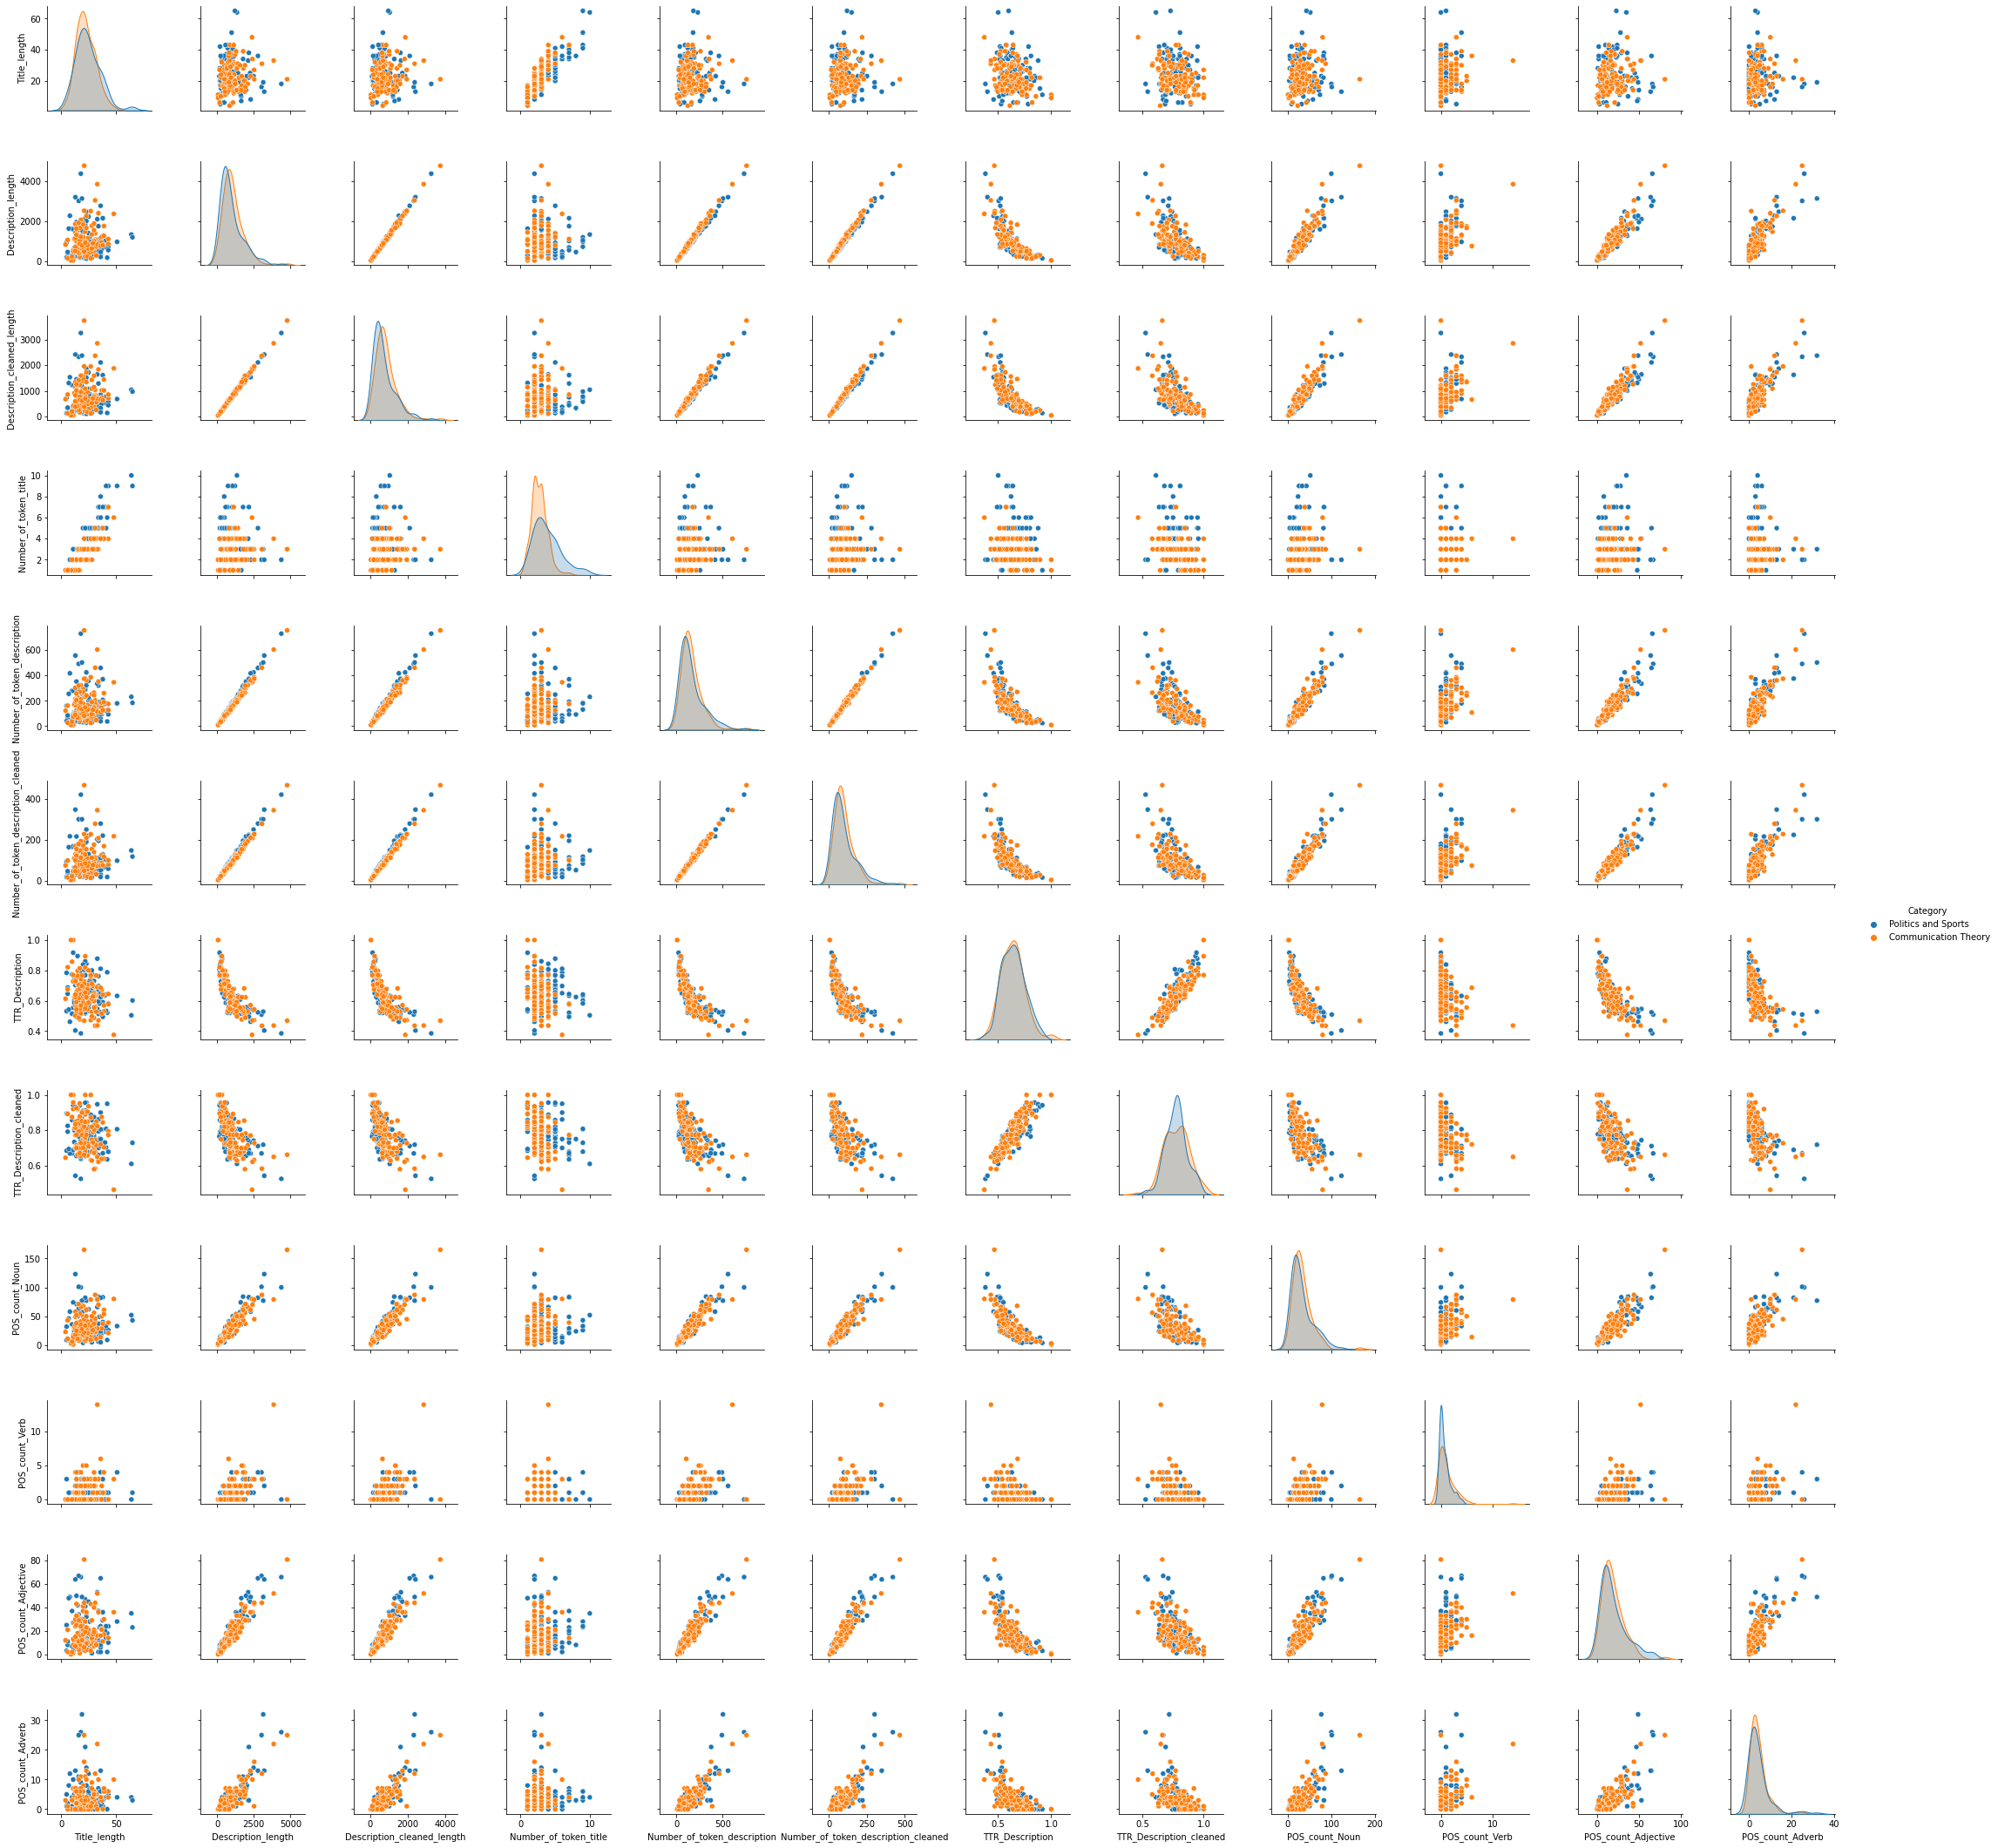

In [ ]:
#Create Pairplot to get first overview
import seaborn as sns
sns.pairplot(df_data, hue='Category')

The first impression is, that there are not big differences between the categories. Nevertheless it can be said, that the categorie 'Politics and Sports' uses a little bite more tokens in the titels of the pages.

### TTR

In the following section I will have a look at the Type-Token-Ratio per category.

To get as many Information as possible out of this analysis I always lookd at the TTR of the Describtion and on the TTR of the cleaned Description.

Lets first have a look at the distribution:

In [ ]:
#Split DataFrame into two categories
df_ps = df_data.loc[(df_data['Category'] == 'Politics and Sports')]
df_ct = df_data.loc[(df_data['Category'] == 'Communication Theory')]

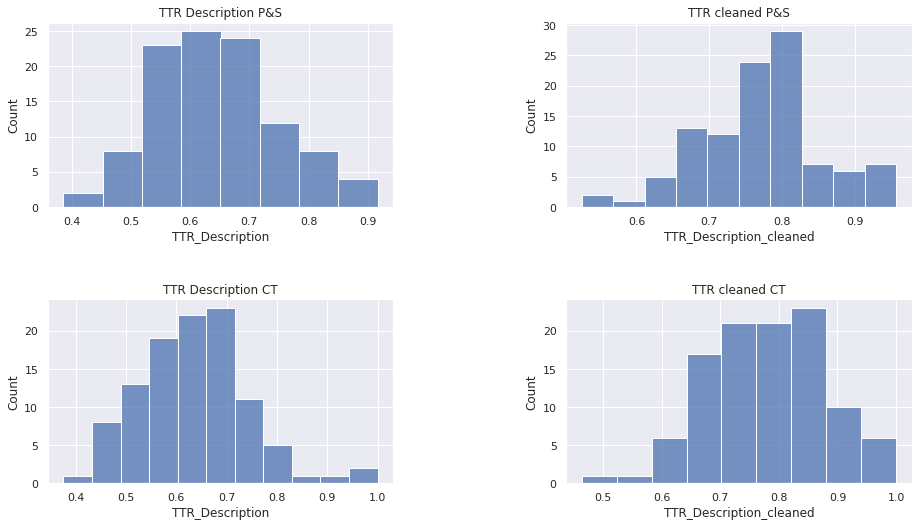

In [ ]:
#Define size of plot
sns.set(rc = {'figure.figsize':(15,8)})

#Plot Histogramms of TTR for 'Description' and 'Description_cleaned' per categorie
fig = plt.figure()
ax = fig.add_subplot(2, 2, 1)
sns.histplot(df_ps['TTR_Description'],ax=ax).set(title = 'TTR Description P&S')
ax = fig.add_subplot(2, 2, 2)
sns.histplot(df_ps['TTR_Description_cleaned'],ax=ax).set(title = 'TTR cleaned P&S')
ax = fig.add_subplot(2, 2, 3)
sns.histplot(df_ct['TTR_Description'],ax=ax).set(title = 'TTR Description CT')
ax = fig.add_subplot(2, 2, 4)
sns.histplot(df_ct['TTR_Description_cleaned'],ax=ax).set(title = 'TTR cleaned CT')

#Rearrange plots
plt.subplots_adjust(left=0.1, 
                    bottom=0.1,  
                    right=0.9,  
                    top=0.9,  
                    wspace=0.5,  
                    hspace=0.5)


plt.show()

In the above histograms we can see, that the distributions of the different categories do not differ very much from each other and these are at least reminiscent of a gaussian normal distribution.

But if we look a little bit closer on the plots from the category 'Communication Theory' (CT), we can see that the distribution 'TTR Description CT' is a bit left skeewd and the distribution of 'TTR cleaned CT' a bit right skeewd.

Overall we have to state, that there are no significant differences between the categories.

As a next step I will have a look at the boxplots of the TTR:

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

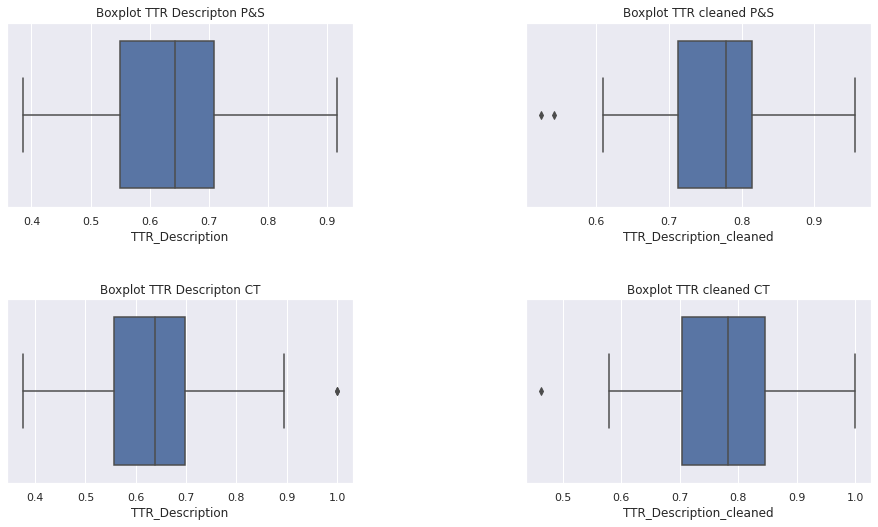

In [ ]:

#Plot Boxplots of TTR for 'Description' and 'Description_cleaned' per categorie
fig = plt.figure()
ax = fig.add_subplot(2, 2, 1)
sns.boxplot(df_ps['TTR_Description']).set(title='Boxplot TTR Descripton P&S')
ax = fig.add_subplot(2, 2, 2)
sns.boxplot(df_ps['TTR_Description_cleaned']).set(title='Boxplot TTR cleaned P&S')
ax = fig.add_subplot(2, 2, 3)
sns.boxplot(df_ct['TTR_Description']).set(title='Boxplot TTR Descripton CT')
ax = fig.add_subplot(2, 2, 4)
sns.boxplot(df_ct['TTR_Description_cleaned']).set(title='Boxplot TTR cleaned CT')

#Rearrange plots
plt.subplots_adjust(left=0.1, 
                    bottom=0.1,  
                    right=0.9,  
                    top=0.9,  
                    wspace=0.5,  
                    hspace=0.5)

#Show plots
plt.show()

The boxplots show that for both 'Communication Theory' and 'Politics and Sport' the 'Type-Token-Ratio' (TTR) is higher for the adjusted description.

However, it is interesting to note that for 'Communication Theory' the interquartile range for both texts (Description & Description_cleaned) is roughly the same. In the category 'Politics and Sport', however, the interquartile range decreases from approx. 0.21 (Description) to approx. 0.11 for the Description_cleaned.

### POS

For the Part of Speech (POS) analysis, I focused on the four categories of nouns, verbs, adjectives and adverbs.

The lineplot below shows the average amount of word groups per category studied ('politics and sports' and 'communication theory'). The POS were calculated on the basis of 'Description_cleaned' so that the 'stopwords' are not taken into account.

From the plot it can be read that there is not really a difference in POS between the categories.

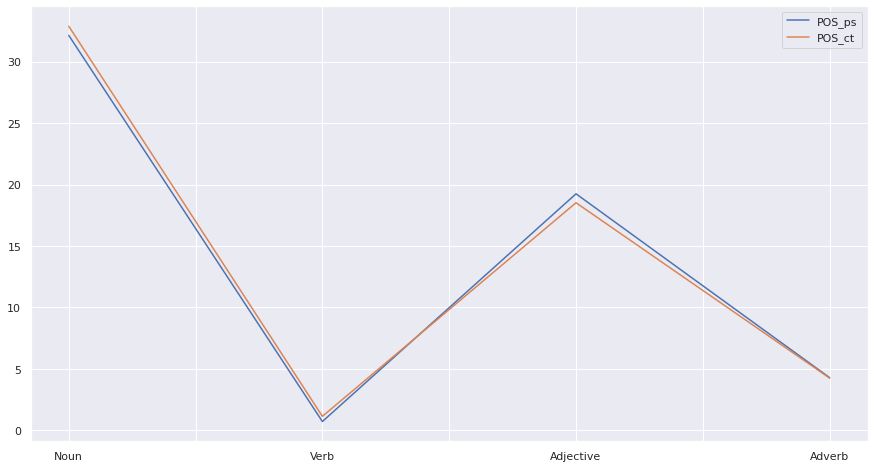

In [ ]:
#Calculate Average count of POS 'Politics and Sports'
av_noun_ps = sum(df_ps['POS_count_Noun'])/len(df_ps)
av_verbs_ps = sum(df_ps['POS_count_Verb'])/len(df_ps)
av_adjective_ps = sum(df_ps['POS_count_Adjective'])/len(df_ps)
av_adverbs_ps = sum(df_ps['POS_count_Adverb'])/len(df_ps)

#Calculate Average count of POS 'Communication Theory'
av_noun_ct = sum(df_ct['POS_count_Noun'])/len(df_ct)
av_verbs_ct = sum(df_ct['POS_count_Verb'])/len(df_ct)
av_adjective_ct = sum(df_ct['POS_count_Adjective'])/len(df_ct)
av_adverbs_ct = sum(df_ct['POS_count_Adverb'])/len(df_ct)

#Create DataFrame to plot
POS_ps = [av_noun_ps,av_verbs_ps,av_adjective_ps,av_adverbs_ps]
POS_ct = [av_noun_ct, av_verbs_ct,av_adjective_ct,av_adverbs_ct]
index = {'Noun': 0, 'Verb':1, 'Adjective':2, 'Adverb':3}

df_POS = pd.DataFrame(POS_ps, columns=['POS_ps'],index=index)
df_POS['POS_ct'] = POS_ct

#Plot
df_POS.plot()

### Number of Stopwords

Another interesting aspect is the analysis of the stop words used. For this purpose, a histogram with the number of 'stopwords' was created for each category. Here it is interesting to see that the category 'politics and sports' (blue) has a strong right skewed distribution. This is the same for the category 'Communication Theory', but the peak is a little more centred. This leads to the conclusion that more stopwords are used in the latter category.

In order to examine this assumption in more detail, boxplots on this topic are drawn up below.

No handles with labels found to put in legend.


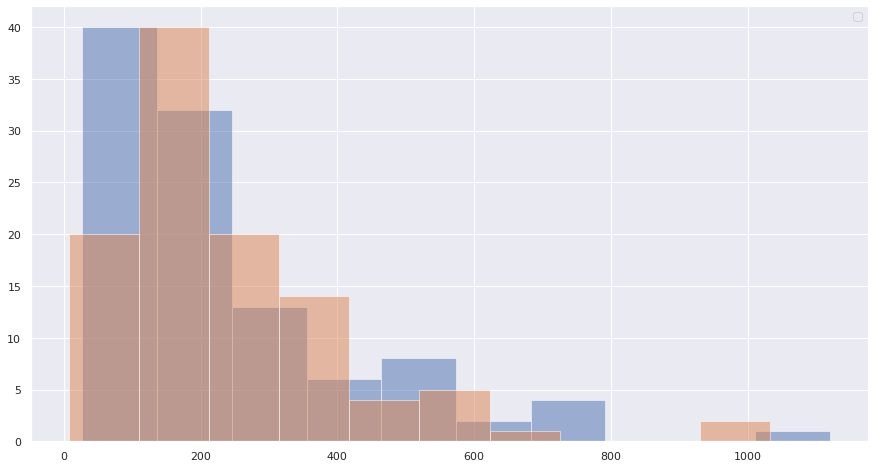

In [ ]:
#Define empty list
corpus = []

#Calculate number of stopwords for Description
number_stopwords_ps = df_ps['Description_length']-df_ps['Description_cleaned_length']
number_stopwords_ct = df_ct['Description_length']-df_ct['Description_cleaned_length']

#Plot Histogramm
number_stopwords_ps.hist(alpha=0.5)
number_stopwords_ct.hist(alpha=0.5)
plt.legend()

The boxplots produced reflect the findings from the histograms above. 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


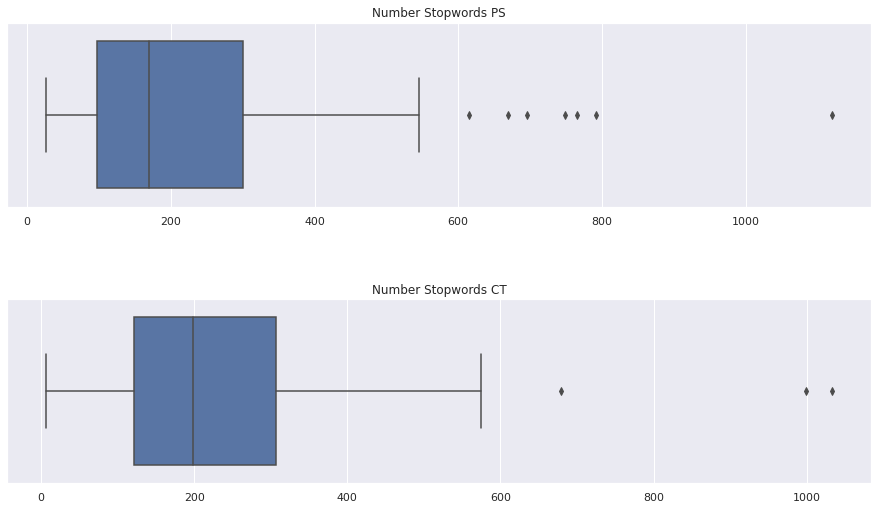

In [ ]:
#Create Boxplot of 'Number of Stopwords' for each category
fig = plt.figure()
ax = fig.add_subplot(2, 1, 1)
sns.boxplot(number_stopwords_ps).set(title='Number Stopwords PS')
ax = fig.add_subplot(2, 1, 2)
sns.boxplot(number_stopwords_ct).set(title='Number Stopwords CT')

#Rearrange Plots
plt.subplots_adjust(left=0.1, 
                    bottom=0.1,  
                    right=0.9,  
                    top=0.9,  
                    wspace=0.5,  
                    hspace=0.5)

#Show plot
plt.show()

### Wordcloud

In [ ]:
#Import Wordcloud
from wordcloud import WordCloud

Finally, one Wordcloud per topic is to be created. This should give an overview of the most important and most frequently mentioned words. Furthermore, the word cloud can be used to draw conclusions about the topics it contains.

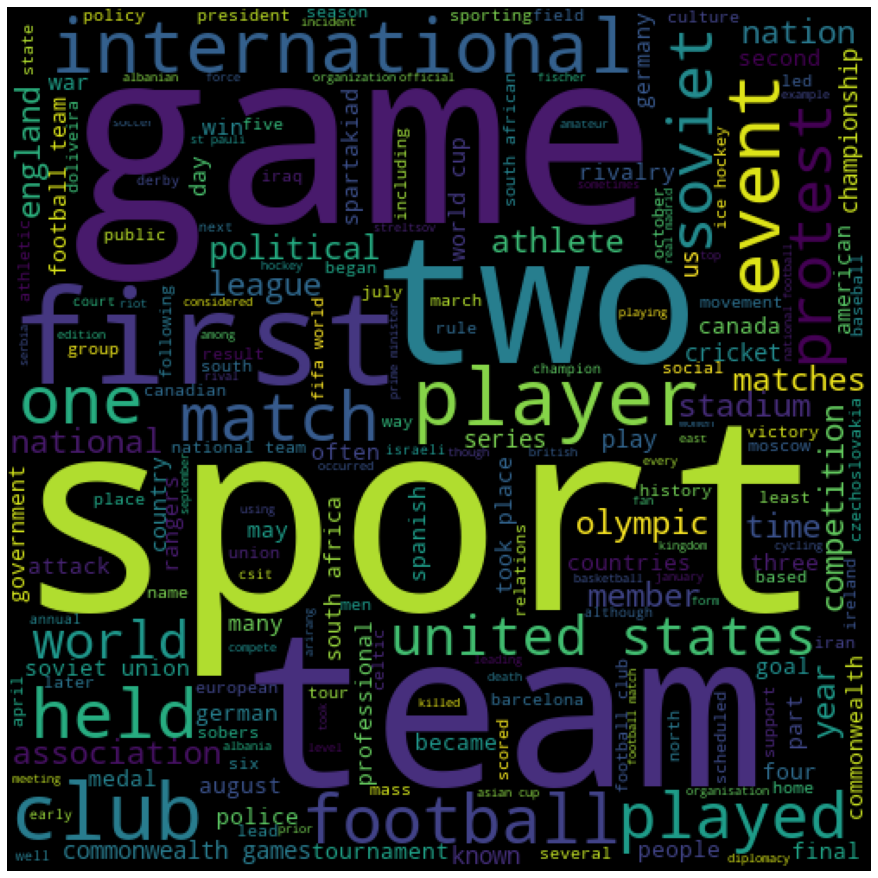

In [ ]:
#Create series object with strings
ps_summary = df_ps['Description_cleaned']
#Concatenate Strings together
ps_summary = ps_summary.str.cat()

#Create Wordcloud
wordcloud_ps = WordCloud(width=500,
                         height=500,
                         background_color='black',
                         min_font_size=6).generate(ps_summary)

#Plot Wordcloud
plt.figure(figsize = (12, 12), facecolor = None) 
plt.imshow(wordcloud_ps)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

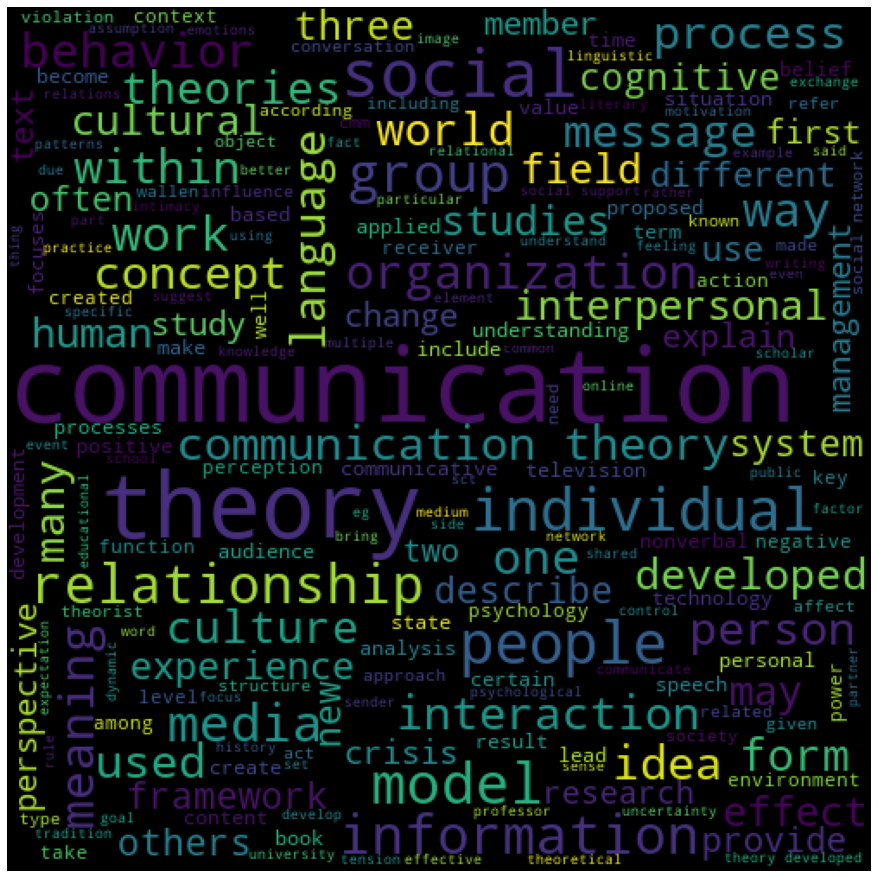

In [ ]:
#Create series object with strings
ct_summary = df_ct['Description_cleaned']
#Concatenate Strings together
ct_summary = ct_summary.str.cat()

#Create Wordcloud
wordcloud_ct = WordCloud(width=500,
                         height=500,
                         background_color='black',
                         min_font_size=6).generate(ct_summary)

#Plot Wordcloud
plt.figure(figsize = (12, 12), facecolor = None) 
plt.imshow(wordcloud_ct)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

## Learnings

With regard to the differences between the texts studied, no particular differences or similarities could be discovered. However, this is probably also related to the fact that all the data came from Wikipedia and thus a descriptive writing style was used.

It would have been exciting to use one source from Wikipedia and one from an opinion medium such as [blick.ch](https://www.blick.ch/). There, any differences regarding the words used etc. would have been greater.

With regard to the tools used, some lessons could be learned from the exercise. Besides the experience that there are many helpful existing tools for processing text data, it was exciting to see how detailed such text data can be analysed and which key figures and possibilities (TTR, POS-tagging etc.) are available. It became clear that a good understanding of the text can be gained through deeper exploratory analysis and it will be exciting to see what can now be done with this data in terms of modelling. 